## Random Forest - Heat surface - 2bins - 80/20

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import pycm
from ast import literal_eval
import sys
sys.path.append("../plotutils/")
from plotutils import *
plt.style.use("../plotutils/your.mplstyle")

In [2]:
df = pd.read_csv(f"../Desalination_dataset.csv", sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   effects                     30 non-null     int64  
 1   steam_temperature           30 non-null     int64  
 2   steam_pressure              30 non-null     float64
 3   delta_T                     30 non-null     float64
 4   specific_surface            30 non-null     float64
 5   GOR                         30 non-null     float64
 6   specificSurface_2bins_5050  30 non-null     int64  
 7   specificSurface_8020        30 non-null     int64  
 8   GOR_2bins_5050              30 non-null     int64  
 9   GOR_6733                    30 non-null     int64  
 10  effects_T                   30 non-null     object 
dtypes: float64(4), int64(6), object(1)
memory usage: 2.7+ KB


In [11]:
def prepare_dataset_classification(
    df,
    target = "specificSurface_8020",
    representation = ["effects", "delta_T"],
    random_state=42,
    train_size=20
):
    df_train, df_test = train_test_split(
        df,
        train_size=train_size,
        random_state=random_state,
        stratify=df[target].astype(int).values,
    )
    print(len(df_train), len(df_test))
    
    X_train, y_train = df_train[representation], df_train[target]
    X_test, y_test = df_test[representation], df_test[target]
    
    return X_train, y_train, X_test, y_test

In [12]:
def train_and_evaluate_classifier(X_train, y_train, X_test, y_test, random_state=42):
    clf = RandomForestClassifier(
        n_estimators=100, 
        random_state=random_state,
        verbose=True
    )
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_test = np.array(y_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_micro = f1_score(y_test, y_pred, average="micro")
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    
    return y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa

In [13]:
def metrics_dict():
    metrics_dict = {
        "train_size": train_size,
        "y_true": y_test_all,
        "y_pred": y_pred_all,
        "accuracy": acc_scores,
        "f1_macro": f1macro_scores,
        "f1_micro": f1micro_scores,
        "f1_weighted": f1weighted_scores,
        "kappa": kappa_scores
    }
    return metrics_dict

### training size = 5

In [14]:
train_size = 5
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [15]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
5 25
random_state = 42
Accuracy: 0.92
F1 macro: 0.875
F1 micro: 0.92
F1 weighted: 0.92
Kappa: 0.75
-------------Iteration 2/10
5 25
random_state = 43
Accuracy: 0.96
F1 macro: 0.9322493224932249
F1 micro: 0.96
F1 weighted: 0.9582655826558266
Kappa: 0.8648648648648649
-------------Iteration 3/10
5 25
random_state = 44


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.84
F1 macro: 0.7023809523809523
F1 micro: 0.84
F1 weighted: 0.8238095238095238
Kappa: 0.41176470588235303
-------------Iteration 4/10
5 25
random_state = 45
Accuracy: 0.92
F1 macro: 0.875
F1 micro: 0.92
F1 weighted: 0.92
Kappa: 0.75
-------------Iteration 5/10
5 25
random_state = 46
Accuracy: 0.96
F1 macro: 0.9322493224932249
F1 micro: 0.96
F1 weighted: 0.9582655826558266
Kappa: 0.8648648648648649
-------------Iteration 6/10
5 25
random_state = 47
Accuracy: 0.88
F1 macro: 0.7508305647840532
F1 micro: 0.88
F1 weighted: 0.8584717607973422
Kappa: 0.5161290322580645
-------------Iteration 7/10
5 25
random_state = 48


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.84
F1 macro: 0.7023809523809523
F1 micro: 0.84
F1 weighted: 0.8238095238095238
Kappa: 0.41176470588235303
-------------Iteration 8/10
5 25
random_state = 49
Accuracy: 0.88
F1 macro: 0.8251748251748252
F1 micro: 0.88
F1 weighted: 0.883916083916084
Kappa: 0.6511627906976745
-------------Iteration 9/10
5 25
random_state = 50
Accuracy: 0.88
F1 macro: 0.7508305647840532
F1 micro: 0.88
F1 weighted: 0.8584717607973422
Kappa: 0.5161290322580645
-------------Iteration 10/10
5 25
random_state = 51
Accuracy: 0.88
F1 macro: 0.7508305647840532
F1 micro: 0.88
F1 weighted: 0.8584717607973422
Kappa: 0.5161290322580645


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [16]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 5
mean accuracy: 0.8960000000000001 +/- 0.040792156108742275
mean F1 macro: 0.8096927069275338 +/- 0.0849917112082418
mean F1 micro: 0.8960000000000001 +/- 0.040792156108742275
mean F1 weighted: 0.8863481579238812 +/- 0.047716330494297264
mean Kappa: 0.6252809028966304 +/- 0.16537873306809203


In [17]:
compiled_res_5 = pd.DataFrame(metrics_dict())
compiled_res_5.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.92,0.875000,0.92,0.920000,0.750000
1,5,"[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.96,0.932249,0.96,0.958266,0.864865
2,5,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.84,0.702381,0.84,0.823810,0.411765


### training size = 10

In [18]:
train_size = 10
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [19]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
10 20
random_state = 42
Accuracy: 0.9
F1 macro: 0.84375
F1 micro: 0.9
F1 weighted: 0.9
Kappa: 0.6875
-------------Iteration 2/10
10 20
random_state = 43
Accuracy: 0.85
F1 macro: 0.7849462365591398
F1 micro: 0.85
F1 weighted: 0.8559139784946236
Kappa: 0.5714285714285714
-------------Iteration 3/10
10 20
random_state = 44
Accuracy: 0.85
F1 macro: 0.7849462365591398
F1 micro: 0.85
F1 weighted: 0.8559139784946236
Kappa: 0.5714285714285714
-------------Iteration 4/10
10 20
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.85
F1 macro: 0.6571428571428571
F1 micro: 0.85
F1 weighted: 0.8114285714285714
Kappa: 0.34782608695652173
-------------Iteration 5/10
10 20
random_state = 46
Accuracy: 0.9
F1 macro: 0.803921568627451
F1 micro: 0.9
F1 weighted: 0.8862745098039216
Kappa: 0.6153846153846154
-------------Iteration 6/10
10 20
random_state = 47
Accuracy: 0.9
F1 macro: 0.84375
F1 micro: 0.9
F1 weighted: 0.9
Kappa: 0.6875
-------------Iteration 7/10
10 20
random_state = 48
Accuracy: 0.75
F1 macro: 0.5670995670995671
F1 micro: 0.75
F1 weighted: 0.7359307359307359
Kappa: 0.13793103448275856
-------------Iteration 8/10
10 20
random_state = 49
Accuracy: 0.95
F1 macro: 0.9134199134199135
F1 micro: 0.95
F1 weighted: 0.9471861471861471
Kappa: 0.8275862068965517
-------------Iteration 9/10
10 20
random_state = 50
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 10/10
10 20
random_state = 51
Accuracy: 0.95
F1 macro: 0.9134199134199135
F1 micro: 0.95
F1 weighted: 0

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [20]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 10
mean accuracy: 0.89 +/- 0.066332495807108
mean F1 macro: 0.8112396292827981 +/- 0.11975490430654426
mean F1 micro: 0.89 +/- 0.066332495807108
mean F1 weighted: 0.883983406852477 +/- 0.07122283162644824
mean Kappa: 0.6274171293474142 +/- 0.23459650979675342


In [21]:
compiled_res_10 = pd.DataFrame(metrics_dict())
compiled_res_10.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,10,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.90,0.843750,0.90,0.900000,0.687500
1,10,"[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.85,0.784946,0.85,0.855914,0.571429
2,10,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...",0.85,0.784946,0.85,0.855914,0.571429


### training size = 15

In [22]:
train_size = 15
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [23]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
15 15
random_state = 42
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 2/10
15 15
random_state = 43
Accuracy: 0.8666666666666667
F1 macro: 0.7916666666666666
F1 micro: 0.8666666666666667
F1 weighted: 0.8666666666666667
Kappa: 0.5833333333333333
-------------Iteration 3/10
15 15
random_state = 44
Accuracy: 0.9333333333333333
F1 macro: 0.88
F1 micro: 0.9333333333333333
F1 weighted: 0.928
Kappa: 0.7619047619047619
-------------Iteration 4/10
15 15
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8666666666666667
F1 macro: 0.7115384615384616
F1 micro: 0.8666666666666667
F1 weighted: 0.8384615384615385
Kappa: 0.4444444444444444
-------------Iteration 5/10
15 15
random_state = 46
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 6/10
15 15
random_state = 47
Accuracy: 0.8666666666666667
F1 macro: 0.7916666666666666
F1 micro: 0.8666666666666667
F1 weighted: 0.8666666666666667
Kappa: 0.5833333333333333
-------------Iteration 7/10
15 15
random_state = 48


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8666666666666667
F1 macro: 0.7916666666666666
F1 micro: 0.8666666666666667
F1 weighted: 0.8666666666666667
Kappa: 0.5833333333333333
-------------Iteration 8/10
15 15
random_state = 49
Accuracy: 0.9333333333333333
F1 macro: 0.88
F1 micro: 0.9333333333333333
F1 weighted: 0.928
Kappa: 0.7619047619047619
-------------Iteration 9/10
15 15
random_state = 50
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 10/10
15 15
random_state = 51
Accuracy: 0.8666666666666667
F1 macro: 0.7916666666666666
F1 micro: 0.8666666666666667
F1 weighted: 0.8666666666666667
Kappa: 0.5833333333333333


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [24]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 15
mean accuracy: 0.9200000000000002 +/- 0.0581186525805423
mean F1 macro: 0.8638205128205128 +/- 0.10008628427413399
mean F1 micro: 0.9200000000000002 +/- 0.0581186525805423
mean F1 weighted: 0.9161128205128206 +/- 0.06099442338786509
mean Kappa: 0.7301587301587301 +/- 0.19705887330055774


In [25]:
compiled_res_15 = pd.DataFrame(metrics_dict())
compiled_res_15.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]",1.000000,1.000000,1.000000,1.000000,1.000000
1,15,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]",0.866667,0.791667,0.866667,0.866667,0.583333
2,15,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]",0.933333,0.880000,0.933333,0.928000,0.761905


### training size = 20

In [26]:
train_size = 20
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [27]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
20 10
random_state = 42
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 2/10
20 10
random_state = 43
Accuracy: 0.9
F1 macro: 0.8666666666666667
F1 micro: 0.9
F1 weighted: 0.9066666666666666
Kappa: 0.736842105263158
-------------Iteration 3/10
20 10
random_state = 44


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9
F1 macro: 0.803921568627451
F1 micro: 0.9
F1 weighted: 0.8862745098039216
Kappa: 0.6153846153846154
-------------Iteration 4/10
20 10
random_state = 45
Accuracy: 0.8
F1 macro: 0.4444444444444444
F1 micro: 0.8
F1 weighted: 0.711111111111111
Kappa: 0.0
-------------Iteration 5/10
20 10
random_state = 46
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 6/10
20 10
random_state = 47
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 7/10
20 10
random_state = 48


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9
F1 macro: 0.8666666666666667
F1 micro: 0.9
F1 weighted: 0.9066666666666666
Kappa: 0.736842105263158
-------------Iteration 8/10
20 10
random_state = 49
Accuracy: 0.9
F1 macro: 0.803921568627451
F1 micro: 0.9
F1 weighted: 0.8862745098039216
Kappa: 0.6153846153846154
-------------Iteration 9/10
20 10
random_state = 50
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 10/10
20 10
random_state = 51
Accuracy: 0.9
F1 macro: 0.803921568627451
F1 micro: 0.9
F1 weighted: 0.8862745098039216
Kappa: 0.6153846153846154


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [28]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 20
mean accuracy: 0.93 +/- 0.06403124237432847
mean F1 macro: 0.8589542483660132 +/- 0.16143071085539845
mean F1 micro: 0.93 +/- 0.06403124237432847
mean F1 weighted: 0.9183267973856211 +/- 0.08542502762879263
mean Kappa: 0.7319838056680161 +/- 0.2939327020137735


In [29]:
compiled_res_20 = pd.DataFrame(metrics_dict())
compiled_res_20.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,20,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",1.0,1.000000,1.0,1.000000,1.000000
1,20,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 1, 0, 0, 1, 0, 0]",0.9,0.866667,0.9,0.906667,0.736842
2,20,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",0.9,0.803922,0.9,0.886275,0.615385


### training size = 25

In [30]:
train_size = 25
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [31]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
25 5
random_state = 42
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 2/10
25 5
random_state = 43
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 3/10
25 5
random_state = 44
Accuracy: 0.8
F1 macro: 0.4444444444444444
F1 micro: 0.8
F1 weighted: 0.711111111111111
Kappa: 0.0
-------------Iteration 4/10
25 5
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8
F1 macro: 0.4444444444444444
F1 micro: 0.8
F1 weighted: 0.711111111111111
Kappa: 0.0
-------------Iteration 5/10
25 5
random_state = 46
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 6/10
25 5
random_state = 47
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 7/10
25 5
random_state = 48


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 8/10
25 5
random_state = 49
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 9/10
25 5
random_state = 50
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 10/10
25 5
random_state = 51
Accuracy: 0.8
F1 macro: 0.4444444444444444
F1 micro: 0.8
F1 weighted: 0.711111111111111
Kappa: 0.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [32]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 25
mean accuracy: 0.9400000000000001 +/- 0.09165151389911678
mean F1 macro: 0.8333333333333334 +/- 0.2545875386086578
mean F1 micro: 0.9400000000000001 +/- 0.09165151389911678
mean F1 weighted: 0.9133333333333333 +/- 0.1323855200765021
mean Kappa: 0.7 +/- 0.45825756949558405


In [33]:
compiled_res_25 = pd.DataFrame(metrics_dict())
compiled_res_25.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,25,"[0, 0, 0, 0, 1]","[0, 0, 0, 0, 1]",1.0,1.000000,1.0,1.000000,1.0
1,25,"[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]",1.0,1.000000,1.0,1.000000,1.0
2,25,"[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",0.8,0.444444,0.8,0.711111,0.0


In [34]:
compiled_res = pd.concat([
    compiled_res_5, 
    compiled_res_10,
    compiled_res_15,
    compiled_res_20,
    compiled_res_25
], ignore_index=True)
print(len(compiled_res))
compiled_res.head()

50


,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.92,0.875000,0.92,0.920000,0.750000
1,5,"[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.96,0.932249,0.96,0.958266,0.864865
2,5,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.84,0.702381,0.84,0.823810,0.411765
3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",0.92,0.875000,0.92,0.920000,0.750000
4,5,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.96,0.932249,0.96,0.958266,0.864865


In [35]:
compiled_res["y_true"] = compiled_res["y_true"].apply(lambda arr: list(arr))
compiled_res["y_pred"] = compiled_res["y_pred"].apply(lambda arr: list(arr))

In [36]:
compiled_res.to_csv("RF_results_SURFACE_2bins_8020.csv", sep=",", index=False)

In [37]:
df = pd.read_csv("RF_results_SURFACE_2bins_8020.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   train_size   50 non-null     int64  
 1   y_true       50 non-null     object 
 2   y_pred       50 non-null     object 
 3   accuracy     50 non-null     float64
 4   f1_macro     50 non-null     float64
 5   f1_micro     50 non-null     float64
 6   f1_weighted  50 non-null     float64
 7   kappa        50 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.2+ KB


In [38]:
df.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.92,0.875000,0.92,0.920000,0.750000
1,5,"[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.96,0.932249,0.96,0.958266,0.864865
2,5,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.84,0.702381,0.84,0.823810,0.411765


In [39]:
grouped_res = df.select_dtypes(include = ["int", "float"]).groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy            f1_macro           f1_micro            \
               mean       sem      mean       sem     mean       sem   
train_size                                                             
5             0.896  0.013597  0.809693  0.028331    0.896  0.013597   
10            0.890  0.022111  0.811240  0.039918    0.890  0.022111   
15            0.920  0.019373  0.863821  0.033362    0.920  0.019373   
20            0.930  0.021344  0.858954  0.053810    0.930  0.021344   
25            0.940  0.030551  0.833333  0.084863    0.940  0.030551   

           f1_weighted               kappa            
                  mean       sem      mean       sem  
train_size                                            
5             0.886348  0.015905  0.625281  0.055126  
10            0.883983  0.023741  0.627417  0.078199  
15            0.916113  0.020331  0.730159  0.065686  
20            0.918327  0.028475  0.731984  0.097978  
25            0.913333  0.044129  0.700000  0.152753

In [40]:
conf_mats = []
for i in np.arange(len(df)):
    confusion_matrix = {
        'all_y_true': literal_eval(df["y_true"][i]),
        'all_y_pred': literal_eval(df["y_pred"][i])
    }
    conf_mats.append(confusion_matrix)

[[1.  0. ]
 [0.3 0.7]]
accuracy: 0.94


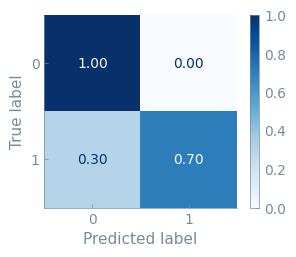

In [41]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]

actual_all, predicted_all = [], []
for index, _ in enumerate(conf_mats_max):
    preds = conf_mats_max[index]
    actual = preds["all_y_true"]
    predicted = preds["all_y_pred"]
    
    for true, pred in zip(actual, predicted):
        actual_all.append(true)
        predicted_all.append(pred)

confusion_matrix = metrics.confusion_matrix(actual_all, predicted_all)
confusion_matrix_norm = confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_norm)

cm = pycm.ConfusionMatrix(list(actual_all), list(predicted_all))
acc = cm.Overall_ACC

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix_norm, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues, include_values=True, values_format=".2f")
#plt.savefig('classif_SURFACE_confusionMatrix_80_20_size25_RF.pdf', bbox_inches='tight')